In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from matplotlib.patches import Rectangle


In [2]:
ar5 = pd.read_excel('../literature_identification/IPCC/Chapter 18 Masterfiles/TablesChapter18.xlsx')
ar5

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,"Mountains, snow and ice",conf. detect.,role of climate,climate driver,reference behaviour,conf. attrib.
1,Africa,Retreat of tropical highland glaciers in East ...,very high,major,"warming, drying",no change,high
2,Europe,"Retreat of Alpine, Scandinavian and Icelandic ...",very high,major,warming,no change,high
3,NaN,Increase in rock slope failures in Western Alp...,high,major,warming,no change,medium
4,Asia,"Permafrost degradation in Siberia, Central Asi...",high,major,warming,no change,high
5,NaN,Shrinking mountain glaciers across most of Asi...,high,major,warming,no change,medium
6,Australasia,Substantial reduction in ice and glacier ice v...,high,major,warming,no change,medium
7,NaN,Significant decline in late-season snow depth ...,high,major,warming,no change,medium
8,North America,Shrinkage of glaciers across western and north...,high,major,warming,no change,high
9,NaN,Decreasing amount of water in spring snowpack ...,high,major,warming,no change,high


In [3]:
seen_df = pd.read_csv('../data/0_labelled_documents.csv')
relevance = pd.read_csv('../data/1_document_relevance.csv')
print(relevance.shape)
print(seen_df.shape)

relevance.head()

(398971, 5)
(2335, 242)


,id,0 - relevance - mean_prediction,0 - relevance - std_prediction,0 - relevance - lower_pred,0 - relevance - upper_pred
0,740010,0.009046,0.001371,0.007675,0.010417
1,3300415,0.055892,0.013545,0.042347,0.069436
2,3821128,0.269951,0.026715,0.243236,0.296665
3,711341,0.465122,0.068707,0.396415,0.533828
4,1474274,0.509145,0.117428,0.391717,0.626573


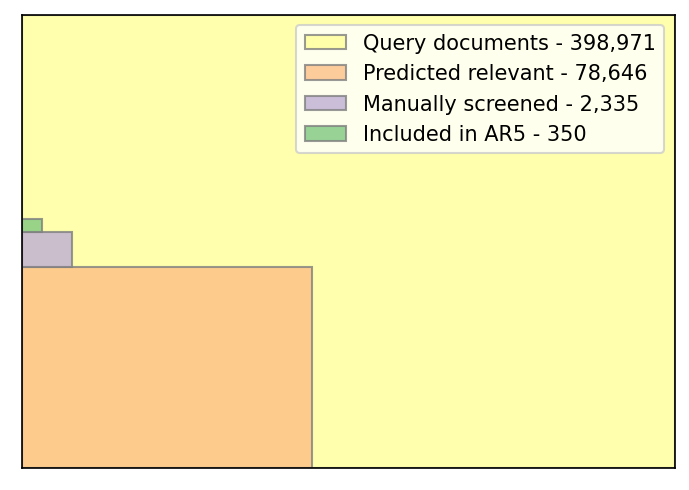

In [4]:
def factorise_square(n, col, label, bottom=0):
    x = np.sqrt(n)*1.2
    y = n/x
    rect = Rectangle(
        (0, bottom),x,y,
        facecolor=col,
        edgecolor="grey",
        label=f"{label} - {n:,}",
        alpha=0.8
    )
    return x,y+bottom, rect

fig, ax = plt.subplots(dpi=150)

cols = ['#7fc97f','#beaed4','#fdc086','#ffff99']
cols.reverse()

x,y,rect = factorise_square(relevance.shape[0], cols[0], "Query documents")
ax.add_patch(rect)

ax.set_xlim(xmax=x)
ax.set_ylim(ymax=y)

rel = relevance[relevance['0 - relevance - mean_prediction']>0.5].shape[0]

x,y,rect = factorise_square(rel, cols[1], "Predicted relevant")
ax.add_patch(rect)

x,y,rect = factorise_square(seen_df.shape[0], cols[2], "Manually screened", bottom=y)
ax.add_patch(rect)

x,y,rect = factorise_square(350, cols[3], "Included in AR5", bottom=y)
ax.add_patch(rect)

ax.set_xticks([])
ax.set_yticks([])

ax.legend()



ax.set_aspect('equal')

In [5]:
relevance[relevance['0 - relevance - mean_prediction']>0].shape[0]

396659

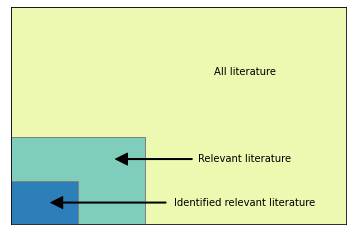

In [6]:

def lit_plot():
    fig, ax = plt.subplots()
    cols = ['#edf8b1','#7fcdbb','#2c7fb8']
    rect = Rectangle(
        (0,0),1,1, 
        facecolor=cols[0],
        edgecolor="grey"
    )
    ax.add_patch(rect)

    ax.annotate(
        "All literature",
        (0.7,0.7),
        ha="center", va="center",
        #arrowprops=dict(facecolor='black', shrink=0.05,width=1),
    )

    rect = Rectangle(
        (0,0),.4,.4, 
        facecolor=cols[1],
        edgecolor="grey"
    )
    ax.add_patch(rect)

    ax.annotate(
        "Relevant literature",
        (0.3,0.3),(0.7,0.3),
        ha="center", va="center",
        arrowprops=dict(facecolor='black', shrink=0.05,width=1),
    )

    rect = Rectangle(
        (0,0),.2,.2,
        facecolor=cols[2],
        edgecolor="grey"
    )
    ax.add_patch(rect)

    ax.annotate(
        "Identified relevant literature",
        (0.1,0.1),(0.7,0.1),
        ha="center", va="center",
        arrowprops=dict(facecolor='black', shrink=0.05,width=1),
    )

    #ax.axis('off')

    ax.set_xticks([])
    ax.set_yticks([])
    return ax

lit_plot()
plt.savefig("../plots/basic_lit_plot.png")

In [7]:
degrees = 2.5
tdf = pd.read_csv(f'../data/study_da_6 - Temperature - upper_pred_{degrees}.csv')
tdf["da_var"] = "Temperature"
pdf = pd.read_csv(f'../data/study_da_6 - Precipitation - upper_pred_{degrees}.csv')
pdf["da_var"] = "Precipitation"

dadf = pd.concat([tdf,pdf])

dadf = dadf[pd.notna(dadf["gridcells"]) & dadf["gridcells"]>0]

dadf["da_trend_p"] = dadf["da_trend_cells"] / dadf["gridcells"]

dadf["da_trend_cat"] = None

dadf.loc[dadf['da_trend_p']==0,"da_trend_cat"] = "0==DA"
dadf.loc[dadf['da_data_cells']==0,"da_trend_cat"] = "NA"
dadf.loc[dadf['da_trend_p']>0,"da_trend_cat"] = "0<DA<0.5"
dadf.loc[dadf['da_trend_p']>0.5,"da_trend_cat"] = "DA>0.5"

places =  pd.read_csv('../data/place_df.csv')

In [8]:
tdf['temperature_da'] = tdf['da_trend_cells']
pdf['precip_da'] = tdf['da_trend_cells']

dadf = tdf[['id','temperature_da']].merge(pdf[['id','precip_da']], how="outer").fillna(0)

dadf['da'] = np.max(dadf[['temperature_da','precip_da']],axis=1)
dadf = dadf[['id','da']]

dadf.head()

,id,da
0,13201,0.0
1,1544528,1.0
2,1287688,0.0
3,245321,0.0
4,1549132,0.0


In [9]:
cat_df = pd.read_csv('../data/1_predicted_category_documents.csv')
predictions = pd.read_csv('../data/1_document_relevance.csv')
df = dadf.merge(cat_df.merge(predictions), how="outer").merge(seen_df, how="outer")


pred_cats = [c for c  in df.columns if "12 - " in c and " - mean_prediction" in c]
for c in pred_cats:
    print(df[c].sum())
    label = c.replace(" - mean_prediction",'')
    cs = [c, c.replace('mean_prediction','lower_pred'), c.replace('mean_prediction','upper_pred')]
    df.loc[df[label]==1,cs] = 1
    print(df[c].sum())
print(pred_cats)

pred_cats = [
    "12 - Terrestrial ES - mean_prediction",
    "12 - Coastal and marine Ecosystems - mean_prediction",
    "12 - Mountains, snow and ice - mean_prediction",
    "12 - Rivers, lakes, and soil moisture - mean_prediction",
    "12 - Human and managed - mean_prediction",
    "12 - Total"
]

pcols = [
    '0 - relevance - mean_prediction',
    '0 - relevance - lower_pred',
    '0 - relevance - upper_pred'
]

df.loc[df['relevant']==1,pcols]=1

print(df.shape)

extra_cat_df = pd.read_csv('../data/1_predicted_category_documents_specific.csv')

specific_impact_cats = [x for x in extra_cat_df.columns if "18 -" in x and "mean" in x]

extra_cat_df = extra_cat_df[["id"]+[x for x in extra_cat_df.columns if "18 - " in x] ]

df = df.merge(extra_cat_df, how="outer")

print(df.shape)

import gspread
from oauth2client.service_account import ServiceAccountCredentials
scope = ['https://spreadsheets.google.com/feeds']
credentials = ServiceAccountCredentials.from_json_keyfile_name('../literature_identification/jupyter-google-e4b72bf44320.json', scope)
gc = gspread.authorize(credentials)
spreadsheet_key = '1o18FIQTmGSWJ_m1ePAzrcVhFlfesESCb2bIEG7ibJAA'
wb = gc.open_by_key(spreadsheet_key)
ws = wb.worksheet("category_label_numbers")
table = ws.get_all_values()
category_map = pd.DataFrame(table[1:], columns=table[0])

impact_columns = [x for x in df.columns if re.match("^4 - ",x)]
for x in impact_columns:
    row = category_map.loc[category_map['Specific category']==x.split(' - ')[1]]
    if row.shape[0]==0:
        continue
    for i, aggscheme in enumerate(row[['Proposed Aggregation 1', 'Proposed Aggregation 2']].values[0]):
        if aggscheme not in ['-','']:
            nc = f'{17+i} - {aggscheme}'
            if nc not in df.columns:
                df[nc] = 0
            df.loc[df[x]==1,nc] = 1


specific_impact_cats = [x for x in df.columns if "18 -" in x and "mean" in x]

for c in specific_impact_cats:
    print(df[c].sum())
    label = c.replace(" - mean_prediction",'')
    cs = [c, c.replace('mean_prediction','lower_pred'), c.replace('mean_prediction','upper_pred')]
    df.loc[df[label]==1,cs] = 1
    print(df[c].sum())
print(pred_cats)

specific_impact_cats

12291.100000000002
12465.100000000002
10176.9
10457.9
4585.8
4744.8
11683.5
11976.5
29838.4
30281.4
['12 - Coastal and marine Ecosystems - mean_prediction', '12 - Human and managed - mean_prediction', '12 - Mountains, snow and ice - mean_prediction', '12 - Rivers, lakes, and soil moisture - mean_prediction', '12 - Terrestrial ES - mean_prediction']
(98418, 301)
(98418, 361)
3848.8
4140.8
1131.5000000000002
1254.5
852.8
998.8
614.0
752.0
436.00000000000006
538.0
3.9
37.900000000000006
14441.100000000002
14990.099999999999
607.6000000000001
667.6
62.49999999999999
153.5
1724.3
1974.3000000000002
297.0
357.0
0.0
12.0
['12 - Terrestrial ES - mean_prediction', '12 - Coastal and marine Ecosystems - mean_prediction', '12 - Mountains, snow and ice - mean_prediction', '12 - Rivers, lakes, and soil moisture - mean_prediction', '12 - Human and managed - mean_prediction', '12 - Total']


['18 - Terrestrial Water Cycle - mean_prediction',
 '18 - Drought & Floods - mean_prediction',
 '18 - Cryosphere - mean_prediction',
 '18 - Coastal and marine Ecosystems - mean_prediction',
 '18 - Food/Agriculture - mean_prediction',
 '18 - Carbon Cycle - mean_prediction',
 '18 - Terrestrial ES - mean_prediction',
 '18 - Wildfires - mean_prediction',
 '18 - Livelihoods and wellbeing - mean_prediction',
 '18 - Health - mean_prediction',
 '18 - Displacement and migration - mean_prediction',
 '18 - Other anthropogenic - mean_prediction']

[Text(0, 0, 'Terrestrial Water Cycle'),
 Text(0, 0, 'Drought & Floods'),
 Text(0, 0, 'Cryosphere'),
 Text(0, 0, 'Coastal and marine Ecosystems'),
 Text(0, 0, 'Food/Agriculture'),
 Text(0, 0, 'Carbon Cycle'),
 Text(0, 0, 'Terrestrial ES'),
 Text(0, 0, 'Wildfires'),
 Text(0, 0, 'Livelihoods and wellbeing'),
 Text(0, 0, 'Health'),
 Text(0, 0, 'Displacement and migration'),
 Text(0, 0, 'Other anthropogenic')]

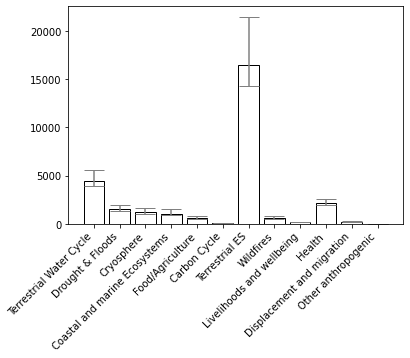

In [10]:
fig, ax = plt.subplots()
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3']

xticks = []
for i, c in enumerate(specific_impact_cats):
    mid = df[
        (df['0 - relevance - mean_prediction']>0.5) & 
        (df[c])>0.5
    ].shape[0]
    ub = df[
        (df['0 - relevance - upper_pred']>0.5) & 
        (df[c.replace('mean_prediction','upper_pred')])>0.5
    ].shape[0]
    lb = df[
        (df['0 - relevance - lower_pred']>0.5) & 
        (df[c.replace('mean_prediction','lower_pred')])>0.5
    ].shape[0]
    ax.bar(i, mid,color="None", edgecolor="black")
    
    eay = np.array([[ub-mid,mid-lb]]).T
    
    ax.errorbar(i, mid, yerr=eay, color="grey", capsize=10)
    
    xticks.append(c.split("-")[1].strip())
    
    
ax.set_xticks(range(i+1))

ax.set_xticklabels(xticks, rotation=45,ha="right")
    

In [11]:
df[df[specific_impact_cats].sum(axis=1)>0].shape

(31478, 387)

In [12]:
df[df[[x.replace('mean_prediction','upper_pred') for x in specific_impact_cats]].sum(axis=1)>0].shape

(31478, 387)

In [13]:
specific_impact_cats

['18 - Terrestrial Water Cycle - mean_prediction',
 '18 - Drought & Floods - mean_prediction',
 '18 - Cryosphere - mean_prediction',
 '18 - Coastal and marine Ecosystems - mean_prediction',
 '18 - Food/Agriculture - mean_prediction',
 '18 - Carbon Cycle - mean_prediction',
 '18 - Terrestrial ES - mean_prediction',
 '18 - Wildfires - mean_prediction',
 '18 - Livelihoods and wellbeing - mean_prediction',
 '18 - Health - mean_prediction',
 '18 - Displacement and migration - mean_prediction',
 '18 - Other anthropogenic - mean_prediction']

In [14]:
specific_impacts = [
    '18 - Terrestrial Water Cycle - mean_prediction',
    '18 - Drought & Floods - mean_prediction',
    '18 - Cryosphere - mean_prediction',
    '18 - Coastal and marine Ecosystems - mean_prediction',
    '18 - Terrestrial ES - mean_prediction',
    #'18 - Carbon Cycle - mean_prediction',
    '18 - Wildfires - mean_prediction',
    '18 - Food/Agriculture - mean_prediction',
    '18 - Livelihoods and wellbeing - mean_prediction',
    '18 - Health - mean_prediction',
    '18 - Displacement and migration - mean_prediction',
    #'18 - Other anthropogenic - mean_prediction'
]

colors = [
    '#7fc97f',
    '#7fc97f',
    '#beaed4',
    '#fdc086',
    '#ffff99',
    '#ffff99',
    '#386cb0',
    '#386cb0',
    '#386cb0',
    '#386cb0'
]

labels = [x.split(" - ")[1] for x in specific_impacts]

counts = []
for i,c in enumerate(specific_impacts):
    ub = df[
        (df['0 - relevance - upper_pred']>=0.0) & 
        (df[c.replace('mean_prediction','upper_pred')])>=0.5
    ].shape[0]    
    counts.append(ub)
    labels[i] = labels[i] + f"\n{ub:,}"


In [15]:
counts

[4990, 1622, 1362, 1183, 18837, 761, 735, 205, 2351, 384]

(0.0, 100.0, 0.0, 100.0)

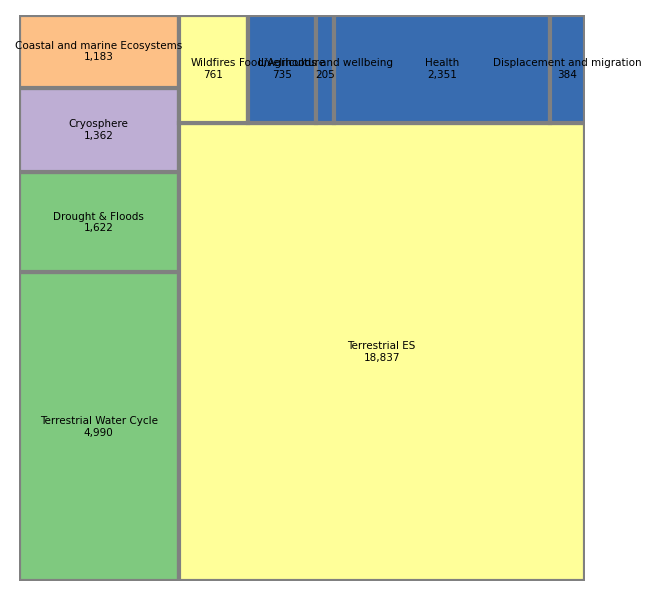

In [16]:
import squarify

fig = plt.figure(figsize=(7,5), dpi=150)

ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(counts, edgecolor="grey", linewidth=2, label=labels, color=colors, text_kwargs={"fontsize":5})

ax.axis('off')

In [17]:
np.sum(counts)

32430

In [18]:

pred_cats = [c for c  in df.columns if "12 - " in c and " - mean_prediction" in c]
for c in pred_cats:
    print(df[c].sum())
    label = c.replace(" - mean_prediction",'')
    cs = [c, c.replace('mean_prediction','lower_pred'), c.replace('mean_prediction','upper_pred')]
    df.loc[df[label]==1,cs] = 1
    print(df[c].sum())
print(pred_cats)

pred_cats = [
    "12 - Terrestrial ES - mean_prediction",
    "12 - Coastal and marine Ecosystems - mean_prediction",
    "12 - Mountains, snow and ice - mean_prediction",
    "12 - Rivers, lakes, and soil moisture - mean_prediction",
    "12 - Human and managed - mean_prediction",
]

pcols = [
    '0 - relevance - mean_prediction',
    '0 - relevance - lower_pred',
    '0 - relevance - upper_pred'
]

df.loc[df['relevant']==1,pcols]=1



12465.099999999999
12465.099999999999
10457.9
10457.9
4744.8
4744.8
11976.499999999998
11976.499999999998
30281.399999999994
30281.399999999994
['12 - Coastal and marine Ecosystems - mean_prediction', '12 - Human and managed - mean_prediction', '12 - Mountains, snow and ice - mean_prediction', '12 - Rivers, lakes, and soil moisture - mean_prediction', '12 - Terrestrial ES - mean_prediction']


(0.0, 100.0, 0.0, 100.0)

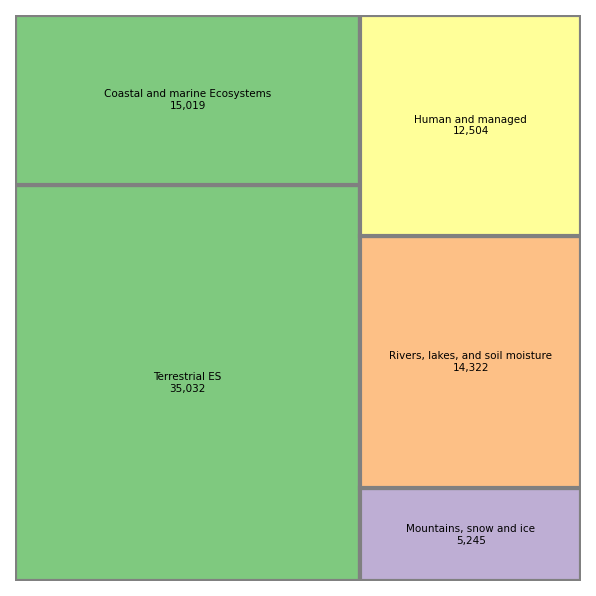

In [20]:
labels = [x.split(" - ")[1] for x in pred_cats]

counts = []
for i,c in enumerate(pred_cats):
    ub = df[
        (df['0 - relevance - upper_pred']>=0.0) & 
        (df[c.replace('mean_prediction','upper_pred')])>=0.5
    ].shape[0]    
    counts.append(ub)
    labels[i] = labels[i] + f"\n{ub:,}"
    
fig = plt.figure(figsize=(7,5), dpi=150)

ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(counts, edgecolor="grey", linewidth=2, label=labels, color=colors, text_kwargs={"fontsize":5})

ax.axis('off')

In [21]:
np.sum(counts)

82122